In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical


In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [4]:
x_train = train_df.drop(columns=["class", "id"], errors='ignore')
y_train = train_df["class"]
x_test = test_df.drop(columns=["class", "id"], errors='ignore')
y_test = test_df["class"]


In [5]:
for col in x_train.columns:
    if x_train[col].dtype == "object":
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

In [8]:
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [9]:
x_train_scaled = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

Xây dựng mô hình LSTM

In [10]:
model = Sequential()
model.add(LSTM(64, input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
model.add(Dense(2, activation='softmax'))

d:\Desktop\ML\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Huấn luyện mô hình

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train_scaled, y_train_categorical, epochs=10, batch_size=64, validation_data=(x_test_scaled, y_test_categorical))

Epoch 1/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9627 - loss: 0.1235 - val_accuracy: 0.7785 - val_loss: 0.9576
Epoch 2/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0281 - val_accuracy: 0.7848 - val_loss: 1.0759
Epoch 3/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.7777 - val_loss: 1.0272
Epoch 4/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.7918 - val_loss: 1.0912
Epoch 5/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.7738 - val_loss: 1.1562
Epoch 6/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0162 - val_accuracy: 0.7792 - val_loss: 1.1638
Epoch 7/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.7818 - val_loss: 1.1042
Epoch 8/10
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9954 - loss: 0.0136 

Đánh giá mô hình

In [14]:
loss, accuracy = model.evaluate(x_test_scaled, y_test_categorical)
print(f"\nAccuracy trên tập kiểm thử: {accuracy:.2%}")

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7924 - loss: 1.1390

Accuracy trên tập kiểm thử: 78.74%


Dự đoán và phân loại

In [15]:
predictions = model.predict(x_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Tính confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_encoded, predicted_classes)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test_encoded, predicted_classes, target_names=label_encoder_y.classes_))


Confusion Matrix:
 [[8273 4560]
 [ 232 9479]]

Classification Report:
               precision    recall  f1-score   support

     anomaly       0.97      0.64      0.78     12833
      normal       0.68      0.98      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544



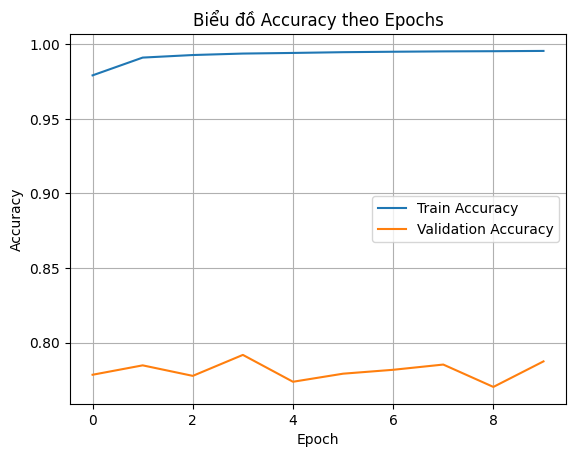

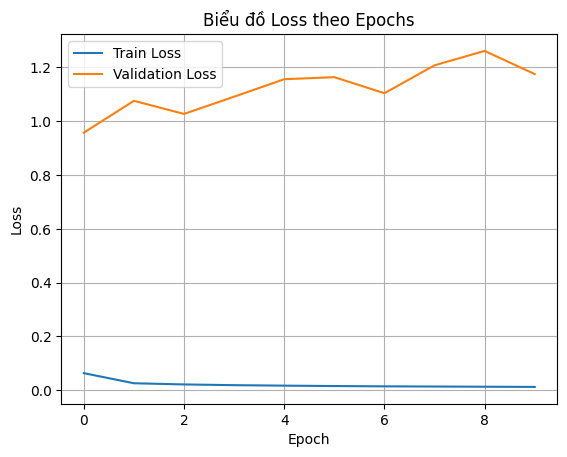

In [17]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Biểu đồ Accuracy theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Biểu đồ Loss theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
